In [55]:
def GeneratorCity(nb_city: int = 10, size_map: tuple = (100, 100)) -> list:
    """
    Return a list of cities with random coordinates and their utility

    Arguments:
        nb_city: Number of cities
        size_map: Area of the map in this format : (max_abscissa, max_ordinate)
        display: Draw a diagram of the situation

    Return:
        An array of cities with the abscissa, ordinate and the use of each cities ;
        0 means "This city is not important" ;
        1 means "This city must be delivered" ;
        2 means "This city is the depository" ;
    """

    # Randomization of points
    abscissa = random.sample(range(0, size_map[0]), nb_city)
    ordinate = random.sample(range(0, size_map[1]), nb_city)

    # Return the list of coordinate
    return [[abscissa[i],ordinate[i]] for i in range(nb_city)]


In [56]:
def DefinitionCity(cities: list) -> list:
    """
    Defines the type of cities

    Arguments:
        cities: The cities

    Return:
        The list of cities
    """

    # Define the kind of city
    delivered = random.choices(population=[0, 1], k=len(cities))

    # Define a repository
    delivered[random.randint(1, len(cities)) - 1] = 2

    # Return the list of city
    return [[cities[i][0],cities[i][1],delivered[i]] for i in range(len(cities))]

In [57]:
def GeneratorGraph(cities: list, fluctuation: int = 10, fluctuation_weight: int = 10):
    """
    Return the graph of the instance

    Arguments:
        cities: The coordinate from the city in this format : [max_abscissa, max_ordinate]
        fluctuation: The rate of fluctuation of the cost of the arcs
        fluctuation_weight: The fluctuation amplitude of the cost of the arcs

    Return:
        A matrix of size [nb_city, nb_city, 3]
    """

    # Initialization of the graph matrix
    generator = np.array([[(0, 0, 0)] * len(cities)] * len(cities))

    # For each element of the graph
    for i in range(len(cities)):
        for j in range(len(cities)):
            if i != j:
                # Traffic randomization
                arc_fluctuation = random.randrange(1, fluctuation)
                # Calculation of the distance between two points
                arc_min_cost = sqrt(pow(cities[i][0] - cities[j][0], 2) + pow(cities[i][1] - cities[j][1], 2))
                # Randomization of the traffic amplitude
                arc_fluctuation_weight = random.randrange(1, fluctuation_weight) * arc_min_cost
                
                # Completion of the matrix
                generator[i][j] = (arc_fluctuation, arc_fluctuation_weight, arc_min_cost)

    # Return the matrix
    return generator


In [58]:
def DisplayGeneratorGraph(graph: np.array([[()]])):
    """
    Print the graph

    Arguments:
        graph: The graph
    """
    
    # For each line
    for i in range(np.shape(graph)[0]):
        # Begin with the check mark character
        print("[", end="")

        # For each column
        for j in range(np.shape(graph)[1]- 1):
            # Print the value and add a comma
            print(graph[i][j], end=", ")

        # Print the last value of the line and close it
        print(str(graph[i][j+1]) + "],")

In [59]:
def DisplayFigure(cities: list):
    """
    Display a figure with the cities

    Arguements:
        cities: The cities
    """

    # Initiate the figure
    fig, ax = plt.subplots()
    
    # Get each cities and display them
    for i in range(len(cities)):   
        ax.scatter(cities[i][0], cities[i][1], c= "red" if cities[i][2] == 0 else "green" if cities[i][2] == 1 else "blue")
        ax.annotate(str(i+1), (cities[i][0], cities[i][1]))

[[0 0 0], [  1 441  88], [  8 297  42], [  7 323  46], [ 8 55 18], [  6 134  67], [  1 182  60], [  8 207  51], [  5 313  44], [  5 243  34]],
[[  9 618  88], [0 0 0], [  6 533  59], [  7 268  67], [ 6 74 74], [ 5 84 28], [  6 247  27], [  2 360  90], [  5 340  68], [  2 166  83]],
[[  8 340  42], [  2 355  59], [0 0 0], [  2 416  59], [ 3 24 24], [  5 224  32], [ 7 74 37], [ 1 32 32], [ 7 61 10], [  9 309  61]],
[[  9 184  46], [  1 335  67], [  1 118  59], [0 0 0], [  2 434  48], [  1 244  61], [  7 224  44], [  5 259  86], [  1 409  68], [  6 112  18]],
[[  3 128  18], [  7 595  74], [  9 169  24], [ 9 96 48], [0 0 0], [  9 254  50], [  7 191  47], [  5 273  39], [  5 243  27], [  5 394  43]],
[[ 6 67 67], [  7 168  28], [  1 224  32], [ 3 61 61], [  6 406  50], [0 0 0], [  6 106  17], [  5 496  62], [ 1 40 40], [  1 432  72]],
[[  5 487  60], [  5 164  27], [  3 222  37], [  3 269  44], [  6 239  47], [  5 124  17], [0 0 0], [ 2 69 69], [  3 235  47], [  9 232  58]],
[[  5 207  51]

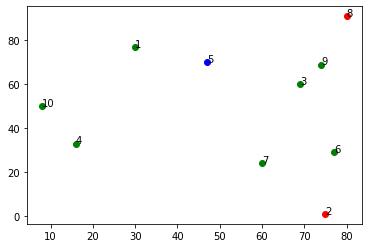

In [88]:
import numpy as np
import random
import matplotlib.pyplot as plt
from math import *

# Generator settings
Nb_Cities = 10
Size_Map = (100, 100)
Fluctuation = 10
Fluctuation_Weight = 10

# Seed of generation
random.seed(a=3)

# Generation of cities
Cities = DefinitionCity(GeneratorCity(Nb_Cities, Size_Map))

DisplayFigure(Cities)

# Generation of the graph
Graph = GeneratorGraph(Cities, Fluctuation, Fluctuation_Weight)
DisplayGeneratorGraph(Graph)

Nb_Cities = 2000
Size_Map = (2000, 2000)
Fluctuation = 10
Fluctuation_Weight = 10

# Pire génération
#for i in range(nb_iteration):
#   Cities = DefinitionCity(GeneratorCity(Nb_Cities, Size_Map))
#   Graphe = GeneratorGraph(Cities, Fluctuation, Fluctuation_Weight)


# Meilleure génération
#Cities = GeneratorCity(Nb_Cities, Size_Map)
#Graphe = GeneratorGraph(Cities, Fluctuation, Fluctuation_Weight)
#for i in range(nb_iteration):
#   Cities = DefinitionCity(Cities)
    
    

In [82]:
def CalculArc(graph: np.array([[()]]), time: float, arc: tuple) -> float:
    """
    Calculates the time needed to use an arc at a given time

    Arguments:
        graph: The graph
        time: The moment the arc is use
        arc: A tuple with (start node, end node)
    
    Return:
        The time used
    """

    # Recovering data from the arc
    a = graph[arc[0]-1][arc[1]-1][0]
    c = graph[arc[0]-1][arc[1]-1][1]
    d = graph[arc[0]-1][arc[1]-1][2]

    # Only if a fluctuation is present
    if a != 0 and c != 0:
        # Calculation of the interval of the function
        intervalle = 2*sqrt(c)/sqrt(a)
        # Time transposition on the function
        time = time % intervalle
        # Calculation of the cost of the arc
        return -1 * a * pow(time - sqrt(c)/sqrt(a), 2) + c + d
    
    else:
        # Return the minimum cost
        return d


print(CalculArc(Graph, 10000, (2, 10)))